# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Exploratory Data Analysis

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1    165
0    138
Name: target, dtype: int64


<AxesSubplot:>

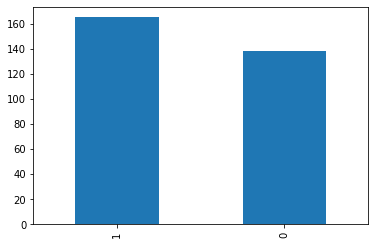

In [4]:
print(df['target'].value_counts())

df['target'].value_counts().plot(kind='bar')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Are there missing data?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency for sex

In [8]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


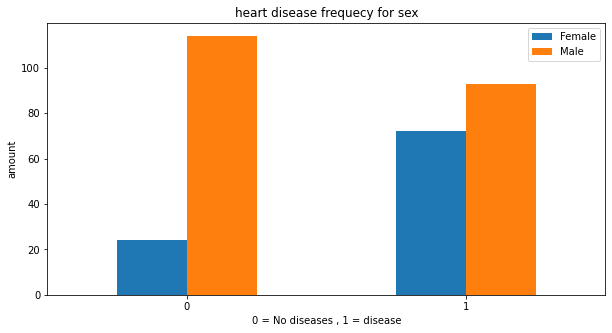

In [9]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,5))

plt.title('heart disease frequecy for sex')
plt.xlabel('0 = No diseases , 1 = disease')
plt.ylabel('amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

## Plotting a diagonal correlation matrix

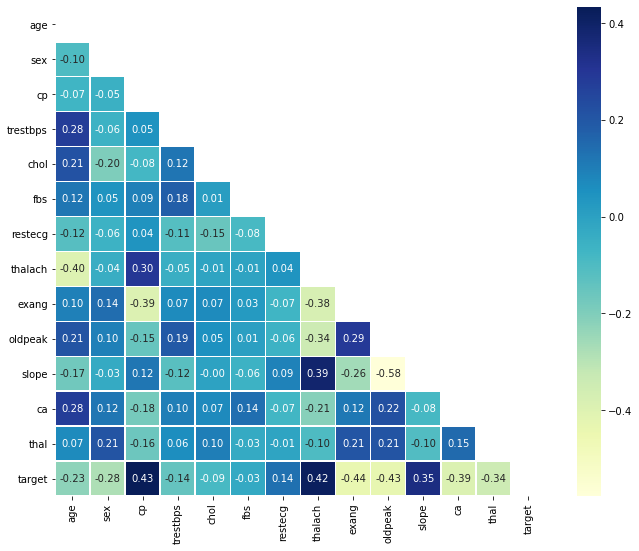

In [10]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))

ax = sns.heatmap(corr,
                 mask=mask,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");



## Preparing  Our Data for maching learning

In [11]:
X = df.drop('target', axis=1)
Y = df['target']

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(242, 13) (61, 13)
(242,) (61,)


## Model Building
We're going to try 3 different machine learning models:

   1. Logistic Regression
   2. K-Nearest Neighbours Classifier
   3. Random Forest Classifier


In [12]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'Random Forest': RandomForestClassifier(),
          'KNN' : KNeighborsClassifier()
         }

def fit_and_score(models,X_train, X_test, y_train, y_test ):
    np.random.seed(0)
    
    model_scores= {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score( X_test, y_test)
    
    return model_scores

In [13]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8524590163934426,
 'Random Forest': 0.8852459016393442,
 'KNN': 0.639344262295082}

## Hyperparamter Tuning 

Since KNN model is doing bad on this dataset, we are going to focus only on RF and LR

We're going to tune:

   1. LogisticRegression() using GridSearchCV
   2. RandomForestClassifier() using RandomizedSearchCV



In [41]:

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":  np.logspace(-4, 4, 20),
                "solver": ['newton-cg', 'liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": [10, 100,200, 1000],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}



In [15]:
gs_log_reg = GridSearchCV(LogisticRegression(max_iter=1000),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
gs_log_reg.fit(X_train, y_train)
gs_log_reg.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'C': 1.623776739188721, 'solver': 'liblinear'}

In [16]:
gs_log_reg.score(X_test,y_test)

0.8524590163934426

In [42]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=30,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

rs_rf.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 17,
 'max_depth': 10}

In [19]:
rs_rf.score(X_test, y_test)

0.8524590163934426

after hyperparameter tuning , our  Random forest model somehow got worse, so we are going to stick to logistic regression and evaluate it beyond accuracy

## Evaluting our tuned machine learning classifier, beyond accuracy

In [23]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

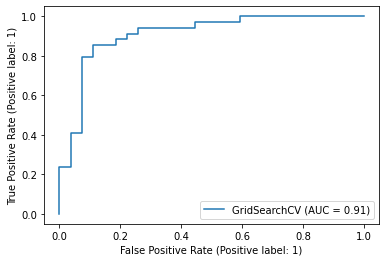

In [24]:
plot_roc_curve(gs_log_reg, X_test, y_test)

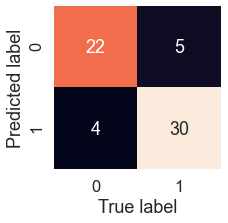

In [25]:

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test, y_preds)



In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Feature Importance
Let's find the feature importance for our LogisticRegression model

In [26]:
clf = LogisticRegression(C=1.623776739188721,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [27]:
clf.coef_

array([[ 0.00661326, -1.62149647,  0.76173075, -0.00849028, -0.00404457,
        -0.35454646,  0.2332777 ,  0.02939815, -0.87302514, -0.54104417,
         0.21739426, -0.87128756, -0.69963541]])

In [28]:
feature_dict = dict(zip(list(df.columns), list(clf.coef_[0])))
feature_dict

{'age': 0.006613255202140825,
 'sex': -1.621496470530089,
 'cp': 0.7617307458910836,
 'trestbps': -0.008490284406372688,
 'chol': -0.004044574997028149,
 'fbs': -0.35454645796399276,
 'restecg': 0.23327770486207602,
 'thalach': 0.02939814671017101,
 'exang': -0.8730251439242371,
 'oldpeak': -0.5410441689476765,
 'slope': 0.21739426221761865,
 'ca': -0.8712875602110443,
 'thal': -0.6996354094297089}

<AxesSubplot:title={'center':'Feature Importance'}>

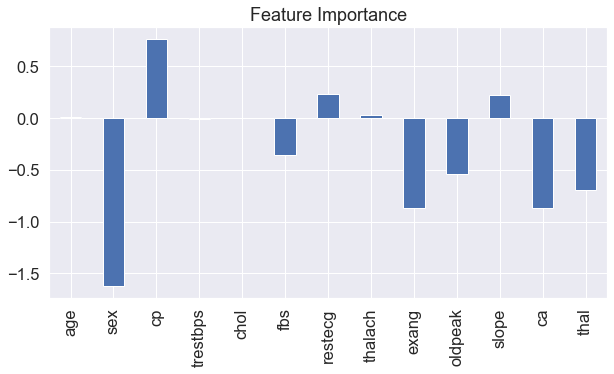

In [40]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar( legend=False, figsize=(10,5), title='Feature Importance')